### **Mount Drive** 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
!wget http://cb.lk/covid_19

--2022-11-26 09:42:32--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 104.21.72.203, 172.67.187.81, 2606:4700:3031::6815:48cb, ...
Connecting to cb.lk (cb.lk)|104.21.72.203|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2022-11-26 09:42:32--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.7.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.7.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2022-11-26 09:42:33--  https://www.dropbox.com/s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4d774

In [ ]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [ ]:
TRAIN_PATH="/content/CovidDataset/Train"
VAL_PATH="/content/CovidDataset/Val"

### **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

#####**Build a sequential model based on CNN**

In [ ]:
from keras.layers.attention.multi_head_attention import activation
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [ ]:
train_datagen=image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen=image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=train_datagen.flow_from_directory(
      "/content/CovidDataset/Train",
      target_size=(224,224),
      batch_size=32,
      class_mode='binary'
)

val_generator=test_datagen.flow_from_directory(
      "/content/CovidDataset/Val",
      target_size=(224,224),
      batch_size=32,
      class_mode='binary'
)



Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
hist=model.fit(
      train_generator,
      #steps_per_epoch=8,
      epochs=10,
      validation_data=val_generator,
      validation_steps=2
)

Epoch 1/10
7/7 [==============================] - 10s 1s/step - loss: 0.5055 - accuracy: 0.7768 - val_loss: 0.4876 - val_accuracy: 0.7500
Epoch 2/10
7/7 [==============================] - 9s 1s/step - loss: 0.4272 - accuracy: 0.7857 - val_loss: 0.4321 - val_accuracy: 0.8667
Epoch 3/10
7/7 [==============================] - 9s 1s/step - loss: 0.2907 - accuracy: 0.9196 - val_loss: 0.2003 - val_accuracy: 0.9500
Epoch 4/10
7/7 [==============================] - 9s 1s/step - loss: 0.2039 - accuracy: 0.9196 - val_loss: 0.1126 - val_accuracy: 0.9500
Epoch 5/10
7/7 [==============================] - 9s 1s/step - loss: 0.3208 - accuracy: 0.8795 - val_loss: 0.1588 - val_accuracy: 0.9667
Epoch 6/10
7/7 [==============================] - 9s 1s/step - loss: 0.2336 - accuracy: 0.9152 - val_loss: 0.1598 - val_accuracy: 0.9667
Epoch 7/10
7/7 [==============================] - 9s 1s/step - loss: 0.1730 - accuracy: 0.9420 - val_loss: 0.1413 - val_accuracy: 0.9667
Epoch 8/10
7/7 [========================

In [ ]:
model.save("covid_19.h5")

In [ ]:
model.evaluate(train_generator)

7/7 [==============================] - 7s 1s/step - loss: 0.1277 - accuracy: 0.9688


[0.1277240514755249, 0.96875]

In [ ]:
model.evaluate(val_generator)

2/2 [==============================] - 2s 789ms/step - loss: 0.0869 - accuracy: 0.9833


[0.08691271394491196, 0.9833333492279053]

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix()

In [ ]:
model=tf.keras.models.load_model('/content/covid_19.h5')

In [ ]:
class_names=train_generator.class_indices
print(class_names)

{'Covid': 0, 'Normal': 1}


In [ ]:
Classes=list(class_names.keys())
print(Classes)

['Covid', 'Normal']


1/1 [==============================] - 0s 19ms/step


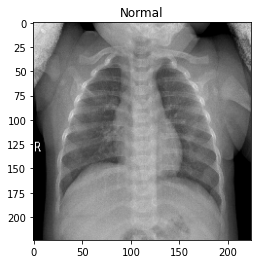

In [ ]:
import os
import matplotlib.pyplot as plt
from keras_preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array 
import numpy as np
path = '/content/CovidDataset/Train/Normal/IM-0525-0001.jpeg'
img = image.load_img(path, target_size=(224,224))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
img_test = np.expand_dims(x, axis=0)
classes = model.predict(img_test, batch_size=10)
# print(type(classes))
# print(classes)
if (int(classes[0][0]) == 0):
  plt.title("Covid")
elif (int(classes[0][0]) == 1):
  plt.title("Normal") 
else:
  plt.title("Can't Recognize")   
# print(classes[0][0])